<a href="https://colab.research.google.com/github/saransh317/LeNet-5/blob/main/LeNet_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

# Add a new axis
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]
print()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape


In [ ]:
#one_hot_encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Data normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

![LeNet-5](http://media5.datahacker.rs/2018/11/LeNet5-1024x188.png)

In [ ]:
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='tanh'))
        self.add(Dense(84, activation='tanh'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
model = LeNet(x_train[0].shape, num_classes)

In [ ]:
model.summary()

Model: "le_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                101

In [ ]:
model.fit(x_train, y=y_train, 
          epochs=20, 
          validation_data=(x_test, y_test), 
          verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


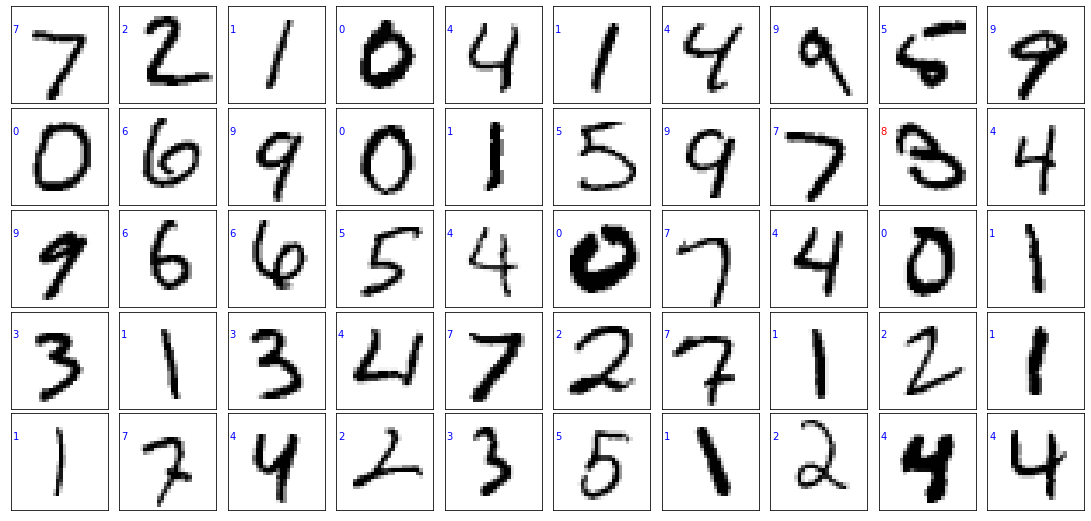

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

prediction_values = model.predict_classes(x_test)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels
for i in range(50):
  ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(x_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
  
  if prediction_values[i] == np.argmax(y_test[i]):
    # label the image with the blue text
    ax.text(0, 7, class_names[prediction_values[i]], color='blue')
  else:
    # label the image with the red text
    ax.text(0, 7, class_names[prediction_values[i]], color='red')